In [52]:
# importção das bibliotecas necessárias

import pandas as pd                                         # manipulação de dados
import numpy as np                                          # calculos matematicos                         
import matplotlib.pyplot as plt                             # plotagem de graficos
from pandas.plotting import register_matplotlib_converters  # configurações de graficos
register_matplotlib_converters()                            # configurações de graficos
from matplotlib.pylab import rcParams                       # configurações de graficos
from statsmodels.tsa.seasonal import seasonal_decompose     # decomposição da serie temporal
from statsmodels.tsa.stattools import adfuller              # teste de dickey fuller
from sklearn.linear_model import LinearRegression           # Algoritmo de Regressão linear

# parametros de configuração do grafico
rcParams['figure.figsize'] = 15, 6

In [2]:
# importação dos dados

dataparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('./data/Airpassengers.csv', 
                   parse_dates=['Month'], 
                   date_parser=dataparse,
                   index_col='Month')

<ipython-input-2-8d6817b48001>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dataparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [3]:
# indices do dataframe

data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

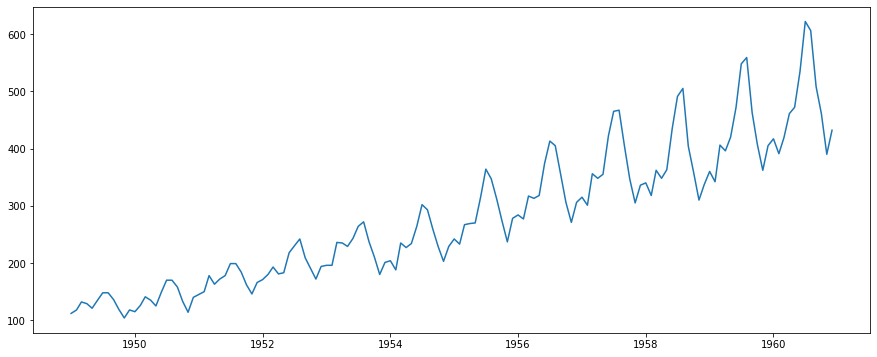

In [4]:
# grafico do airpassengers

plt.plot(data);

In [5]:
# criando modelos de media móvel

optimal_n = None
best_mse = None

# armazenando em float
db = data[['#Passengers']].values.astype('float32')

mean_results_for_all_possibles_n_values = np.zeros(int(len(db) / 2 - 2))

for n in range(3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db) - n)

    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[ :, 0][ i: i+n]) - db[i + n][0], 2)
    
    mean_results_for_all_possibles_n_values[n - 3] = np.mean(mean_for_n)

optimal_n = np.argmin(mean_results_for_all_possibles_n_values) + 3
best_mse = np.min(mean_results_for_all_possibles_n_values)

print('MSE: {}'.format(mean_results_for_all_possibles_n_values))

# melhor legs para criação da média móvel
print('\nO melhor n é: {}'.format(optimal_n))

# melhor métrica
print('\nO melhor mse é: {}'.format(best_mse))

MSE: [ 2339.63356126  2764.88660714  3012.10128709  3151.45469085
  3227.18632274  3256.56100643  3186.6614532   3011.60186946
  2743.00652782  2472.34091928  2354.71361401  2403.15665424
  2555.64628844  2755.90582275  2957.73325883  3148.95678109
  3318.74202065  3471.20655414  3579.85735927  3632.1383133
  3621.28446048  3590.00382793  3614.46072399  3714.23057056
  3856.30383806  4039.07639445  4228.22951927  4417.98332931
  4590.62775569  4759.11651611  4915.97544876  5048.63704665
  5147.82094512  5226.01903743  5334.33177783  5486.37155691
  5665.83581156  5879.92290769  6108.05805477  6311.94563847
  6507.04778972  6685.18398409  6897.90877682  7105.06745207
  7299.11089319  7470.66004841  7664.68188379  7894.86749032
  8104.34268864  8337.10501668  8595.05628641  8844.55092457
  9063.90415815  9272.33339998  9544.40100932  9837.04023888
 10135.60331142 10420.20548681 10725.07181564 11069.94461765
 11393.32528446 11748.71711731 12111.18046458 12433.46474122
 12664.11747454 1293

In [6]:
# usar as configurações testadas para criar um modelo de previsão t + 1

print('MA : %s' % np.mean(db[:, 0][len(db)-optimal_n:len(db)]))

MA : 427.66666


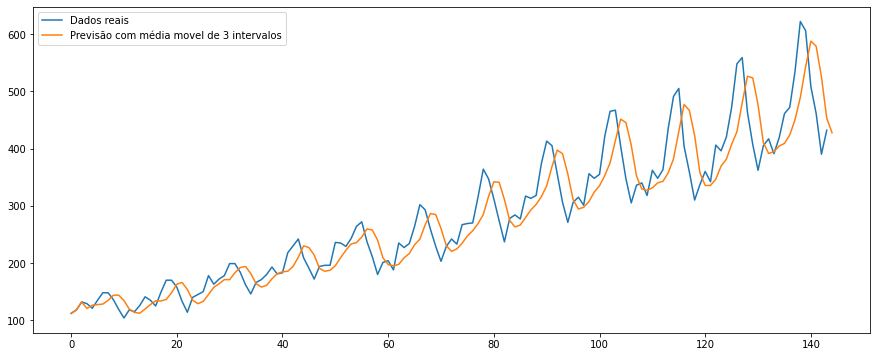

In [7]:
# avaliação gráfica do modelo

forecast = np.zeros(len(db) +1 )
for i in range(0, optimal_n):
    forecast[i] = db[i][0]

for i in range(0, len(db) - optimal_n +1):
    forecast[i + optimal_n] = np.mean(db[ :, 0][i : i + optimal_n])

plt.plot(db[:, 0], label='Dados reais')
plt.plot(forecast, label='Previsão com média movel de 3 intervalos')
plt.legend()
plt.show();

In [8]:
# componentes de uma serie temporal

In [9]:
# primeiros registros

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


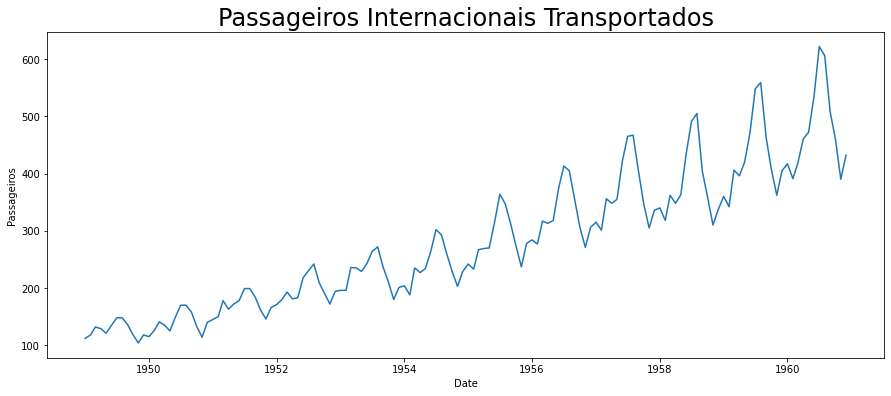

In [10]:
# decomposição da serie temporal
plt.plot(data)
plt.title('Passageiros Internacionais Transportados', fontsize = 24)
plt.ylabel('Passageiros')
plt.xlabel('Date')
plt.show();

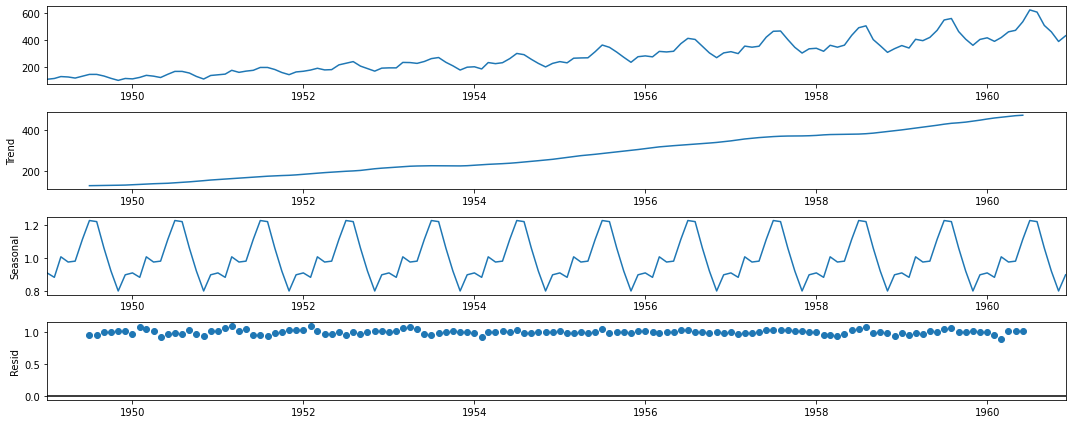

In [11]:
# decomposisção da serie temporal
result = seasonal_decompose(data, model='multiplicative')

# grafico da decomposição da serie
result.plot()
plt.show();

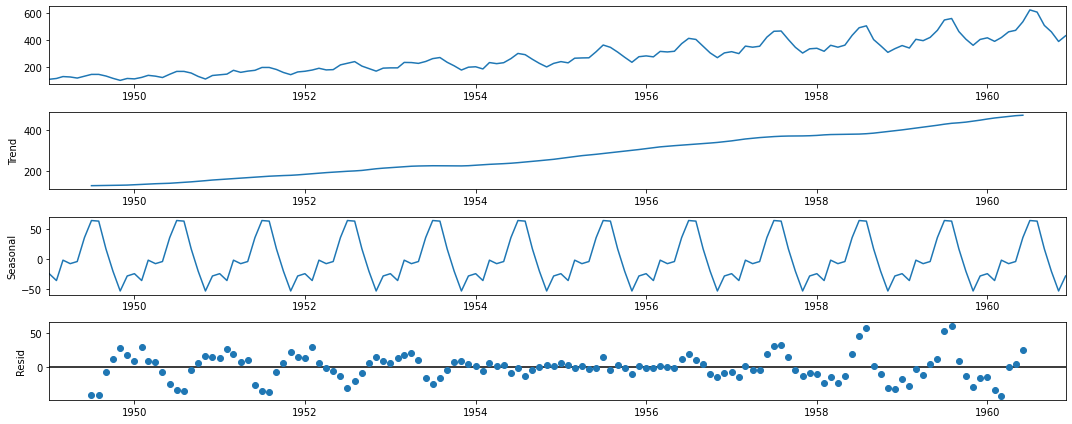

In [12]:
# decomposisção da serie temporal
result2 = seasonal_decompose(data, model='adtive')

# grafico da decomposição da serie
result2.plot()
plt.show();

In [13]:
# testes de estacionariedade

In [14]:
# primeiros dados

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
# executando o teste de fuller

X = data['#Passengers']
result = adfuller(X)
result
print('ADF Estatisticas : %s' % result[0])
print('Valoe de P : %s' % result[1])
print('Valores criticos :')
for key, value in result[4].items():
    print('\t %s: %.3f' % (key, value))

ADF Estatisticas : 0.815368879206046
Valoe de P : 0.991880243437641
Valores criticos :
	 1%: -3.482
	 5%: -2.884
	 10%: -2.579


In [18]:
# o teste mostra que a serie não é estacionaria

In [19]:
# teste do uso de log para transformação da serie em uma serie estacionaria

d_log = np.log(data)

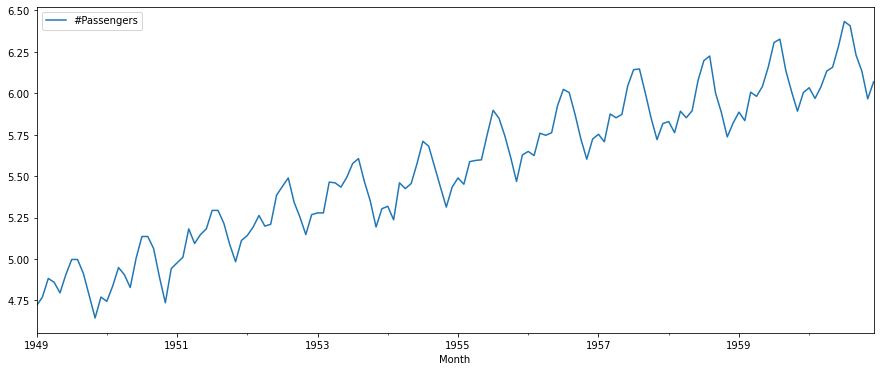

In [20]:
# visualização após trasnformação

d_log.plot()
plt.show();

In [ ]:
# teste de aplicação de diferenciação para transformar a serie 

In [21]:
# teste de Dickey-Fuller
y = data['#Passengers']

def adf_test(y):
    print('Resultado do teste Dickey-Fuller: ')
    df_test = adfuller(y, autolag='AIC')
    df_output = pd.Series(df_test[0 :4], index=['Teste', 'valor_p', 'n_de_legs', 'n_de_observações'])
    for key, value in df_test[4].items():
        df_output[f'Valor critico ({key})'] = value
    print(df_output)

In [22]:
# uso do teste na serie real

adf_test(y)

Resultado do teste Dickey-Fuller: 
Teste                    0.815369
valor_p                  0.991880
n_de_legs               13.000000
n_de_observações       130.000000
Valor critico (1%)      -3.481682
Valor critico (5%)      -2.884042
Valor critico (10%)     -2.578770
dtype: float64


In [24]:
# uso de diferenciação na serie

y_diff = np.diff(y)

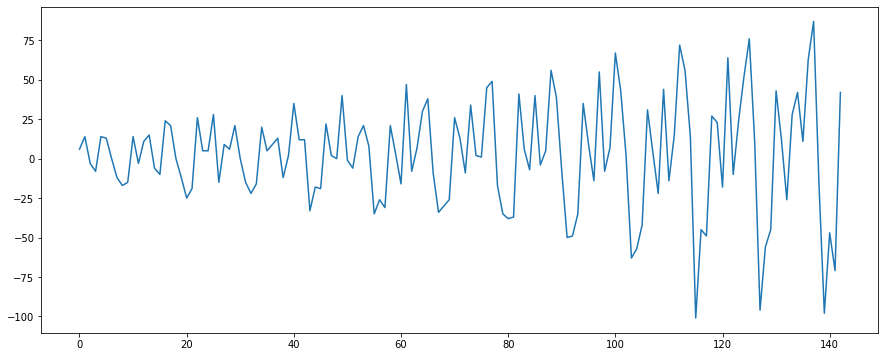

In [27]:
# visualização grafica da serie transformada

plt.plot(y_diff);

In [28]:
# aplicação do teste de Dickey-Fuller na seris tranformada

adf_test(y_diff)

Resultado do teste Dickey-Fuller: 
Teste                   -2.829267
valor_p                  0.054213
n_de_legs               12.000000
n_de_observações       130.000000
Valor critico (1%)      -3.481682
Valor critico (5%)      -2.884042
Valor critico (10%)     -2.578770
dtype: float64


In [29]:
# aplicação da diferenciação de segunda ordem na serie

y_diff2 = np.diff(y_diff)

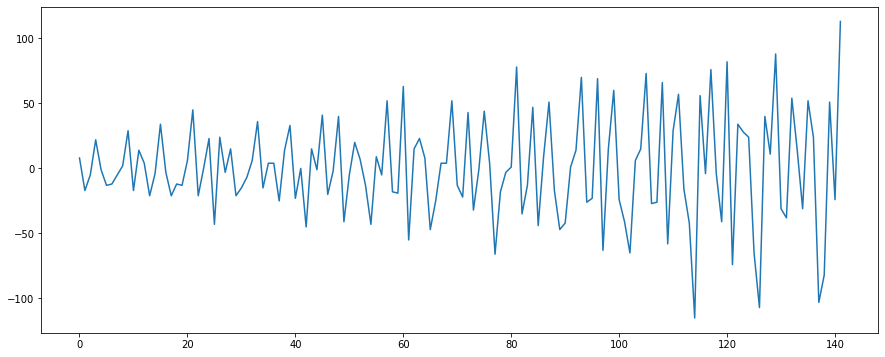

In [30]:
# visualização grafica da diferenciação de segunda ordem

plt.plot(y_diff2);

In [31]:
# aplicação do teste

adf_test(y_diff2)

Resultado do teste Dickey-Fuller: 
Teste                 -1.638423e+01
valor_p                2.732892e-29
n_de_legs              1.100000e+01
n_de_observações       1.300000e+02
Valor critico (1%)    -3.481682e+00
Valor critico (5%)    -2.884042e+00
Valor critico (10%)   -2.578770e+00
dtype: float64


In [32]:
# valor p ficou abaixo de 0.05 mostrando estacionariedade

In [33]:
# aplicação de diferenciação usando medias 

In [34]:
# visualização dos dados

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [35]:

# média 
rolmean = data.rolling(window=12).mean()

# desvio padrão
rolstd = data.rolling(window=12).std()

# impressão dos valores
print(rolmean)
print(rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


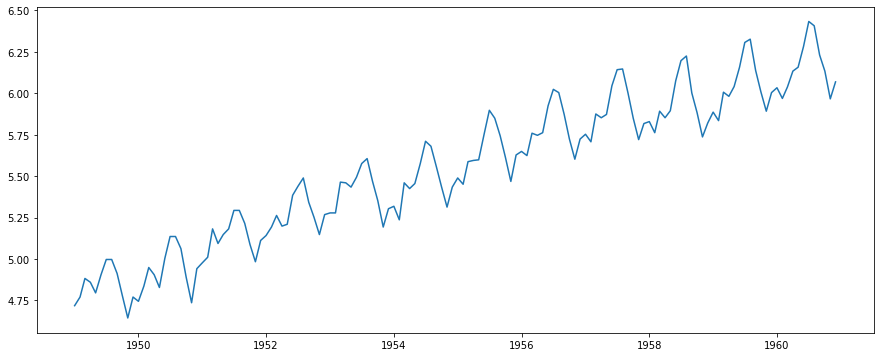

In [36]:
# aplicação e visualização dos dados em log

indexedDataset_logScale = np.log(data)
plt.plot(indexedDataset_logScale);

In [37]:
# criando média e std da serie em log

movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()

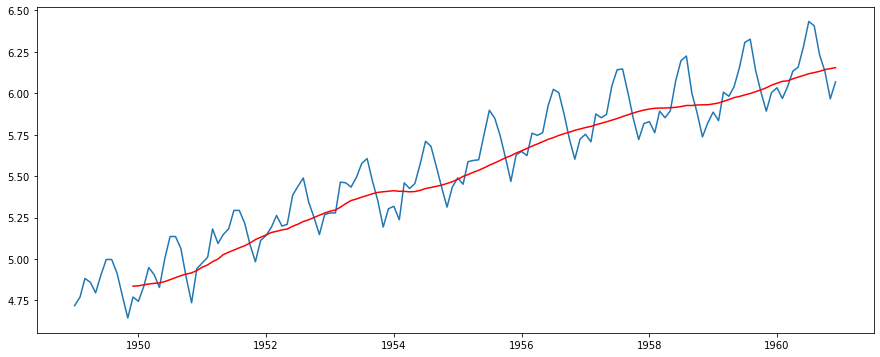

In [39]:
# visualização grafica com dados em log

plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red');

In [40]:
# subtração dos dados em log dos dados movieAverage 

dataset_LogScaleMin_MovingAverage = indexedDataset_logScale - movingAverage
dataset_LogScaleMin_MovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [41]:
# remoção dos valores NaN

dataset_LogScaleMin_MovingAverage.dropna(inplace=True)
dataset_LogScaleMin_MovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [46]:
# teste estatistico estacionariedade

def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()

    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='MA')
    std = plt.plot(movingSTD, color='black', label='Desvio_padrão')

    print('Resultado do teste de Dickey-Fuller: ')
    df_test = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(df_test[0 :4], index=['Estatistica do Teste',
                                                'Valor_p',
                                                'n_intervalos',
                                                'n_obervações'])
    for key, values in df_test[4].items():
        dfoutput[f'Valor critico {key}'] = value
    
    print(dfoutput)

Resultado do teste de Dickey-Fuller: 
Estatistica do Teste     -3.162908
Valor_p                   0.022235
n_intervalos             13.000000
n_obervações            119.000000
Valor critico 1%         -2.578770
Valor critico 5%         -2.578770
Valor critico 10%        -2.578770
dtype: float64


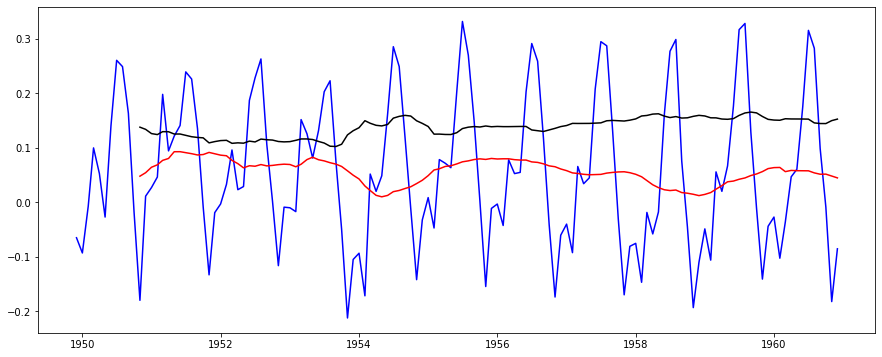

In [47]:
# aplicação da função de teste estatistico

test_stationarity(dataset_LogScaleMin_MovingAverage)

In [48]:
# após transformações a serie se mostrou estacionaria

In [49]:
# remoção da tendencia da serie temporal

In [50]:
# visualizando dados

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [51]:
# transformação dos dados em series para uso em modelo de regressão

X = [i for i in range(0, len(data))]
X = np.reshape(X, (len(X), 1))
y = data.values

In [53]:
# usando modelo de regressão nos dados

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [54]:
# uso da previsão com a propria serie temporal

trend = model.predict(X)

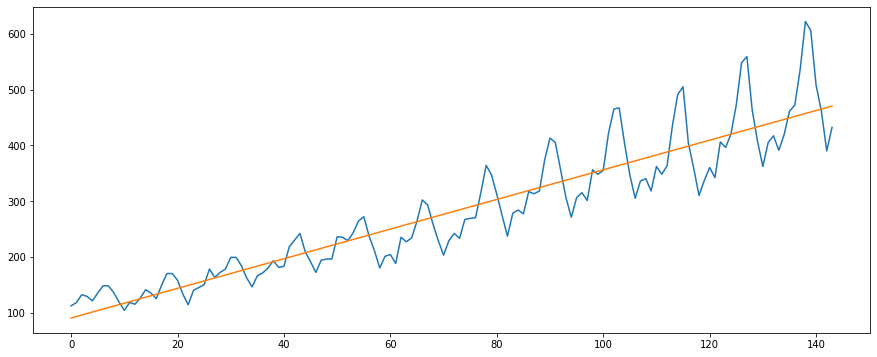

In [55]:
plt.plot(y)
plt.plot(trend)
plt.show();

In [57]:
# subtração da serie temporal a tendencia

detrend = [y [i] - trend[i] for i in range(0, len(data))]

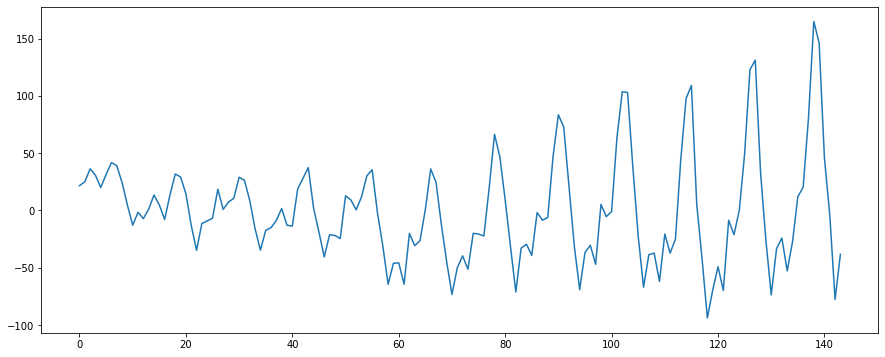

In [58]:
# plotagem da serie após tranformações

plt.plot(detrend)
plt.show();